<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Ex4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

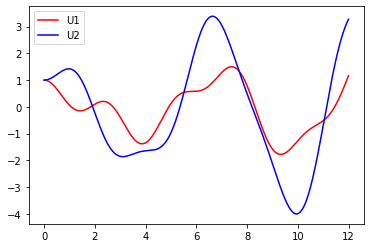

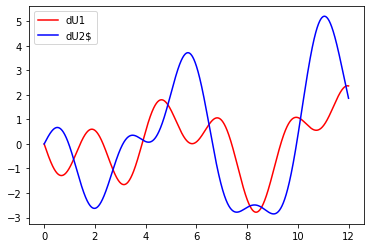

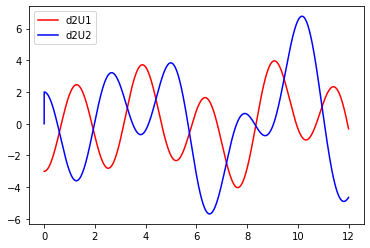

In [0]:
import numpy as np
import matplotlib.pyplot as plt

M=np.array([[2,0],[0,1]])
C=np.zeros([2,2])
K=np.array([[9,-3],[-3,3]])
F2=2

#Omega value 
omega=3/np.sqrt(2)
omega=1

#initial conditions
U0=F2/((6-omega**2)*(3-2*omega**2))*np.array([[6],[2*(9-2*omega**2)]])/2
U0=np.array([[1],[1]])

dU0=np.array([[0],[0]])
d2U0=np.array([[0],[0]])
U=np.array([[1,1]])

#time
dt=.001
total=12

#preparation
Uo=U0-dt*dU0+dt**2/2*d2U0
a0=1/dt**2
a1=1/(2*dt)
a2=2*a0
Mb=a0*M+a1*C


#X=np.concatenate((U0,dU0),axis=0).transpose()
Rb=np.zeros([1,2])

for i in range(0,int(total/dt)):
     if i==0:
        #pt=[0 F2*cos(omega*0*dt)]';
        #pt=np.array([[0,F2*np.cos(omega*0*dt)]]).transpose()
        Rb0=np.matmul(-(K-a2*M),U[0,:].reshape(-1,1))-np.matmul((a0*M-a1*C),Uo);
        U=np.append(U,np.matmul(np.linalg.inv(Mb),Rb0).transpose(),axis=0)
        d2U=(a0*(Uo-2*U[0,:].reshape(-1,1)+U[1,:].reshape(-1,1))).transpose()
        dU=(a1*(-Uo+U[1,:].reshape(-1,1))).transpose()
     else:
        Rb=np.append(Rb,(np.array([[0,F2*np.cos(omega*(i)*dt)]]).transpose()-np.matmul
                          ((K-a2*M),U[i,:].reshape(-1,1))-
                          np.matmul((a0*M-a1*C),U[i-1,:].reshape(-1,1))).transpose(),axis=0)
        
        U=np.append(U,np.matmul(np.linalg.inv(Mb),Rb[i,:].reshape(-1,1)).transpose(),axis=0)
        
        d2U=np.append(d2U,a0*(U[i-1,:].reshape(-1,1)-2*U[i,:].reshape(-1,1)+U[i+1,:].reshape(-1,1)).transpose(),axis=0)
        
        dU=np.append(dU,np.array([a1*(-U[i-1,:]+U[i+1,:])]),axis=0)


plt.figure(1)
plt.plot(np.arange(dt,total+dt,dt), U[:,0][1:],'r')
plt.plot(np.arange(dt,total+dt,dt), U[:,1][1:],'b')
plt.legend(['U1','U2'])

plt.figure(2)
plt.plot(np.arange(dt,total+dt,dt), dU[:,0],'r')
plt.plot(np.arange(dt,total+dt,dt), dU[:,1],'b')
plt.legend(['dU1','dU2$'])

plt.figure(3)
plt.plot(np.arange(dt,total+dt,dt), d2U[:,0],'r')
plt.plot(np.arange(dt,total+dt,dt), d2U[:,1],'b')
plt.legend(['d2U1','d2U2'])